# Introduction to Customer Segmentation in Python

Welcome to this project! We will be analyzing a customer transaction dataset in order to investigate and interpert customer behavious of a certain supplier.

We will be doing exploratory data analysis on our data, before employing a variety of dimensionality reduction techniques, ranging from introfuctory to more advanced. We will visualize our new represntation, before clustering our customers based on their behaviour. Finally, we will visualize our clusters in an interactive way to analyze them and their differences more thoroughly.

## Prerequisites
- Basic level knowledge of Python (for example, NumPy and Pandas)
- Basic understanding of machine learning (what dimensionality reduction is, for example)
- Experience with some plotting libraries can help some understanding, for example Matplotlib (or Seaborn)

## Project Outline
**Task 1**: Introduction (this section)

**Task 2**: Exploratory Data Analysis

**Task 3**: Principal Component Analysis

**Task 4**: Kernel Principal Component Analysis

**Task 5**: K-Means Clustering with Elbow Method

**Task 6**: Interactive Cluster Analysis



## Task 1: Introduction
[This is the dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) we will be using. It is collated by Margarida G. M. S. Cardoso, and comprises annual spending across different types of retail products (for example, Frozen, Grocery, Delicatessen, etc.). We will use unsupervised methods to reduce the dimensionality of this data, and plot the resulting 2-D data, and investigate what our models are learning.

### Additional reading material
These are the concepts and tool we will use in this project.

- [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Kernel Principal Component Analysis (KPCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)
- [K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [3]:
df = pd.read_csv('Data/hospital.csv')

In [4]:
df.head()

Years in Admission_Time Death  Diagnosis_ID  Years in Discharge_Time  \
0                     2013    No             1                     2013   
1                     2013    No             1                     2013   
2                     2013    No             1                     2013   
3                     2013    No             1                     2013   
4                     2013    No             1                     2013   

   Doctor_ID HAI  Years in Patient_ID  Room_ID SSI Surgical_Procedure  \
0          2  No                  NaN       43  No                 No   
1          3  No                  NaN        4  No                 No   
2          3  No                  NaN       23  No                 No   
3          4  No                  NaN       42  No                Yes   
4          4  No                  NaN       49  No                Yes   

  Description Divison_name  ID         Full Name   Specialty  \
0    Diabetes    Neurology   4  Kimberley Cortez    Oncology   
1    Diabetes   Pediatrics   2        Uma Conley  Pediatrics   
2    Diabetes    Neurology   4        Uma Conley  Pediatrics   
3    Diabetes     Oncology   1  Imogene Fletcher  Cardiology   
4    Diabetes     Oncology   1  Imogene Fletcher  Cardiology   

  Total Cost_of_admission  Total Time of Stay  Total Bed_count  \
0            1,637,732.08                 442                2   
1            1,274,894.80                 128                2   
2            1,716,936.70                  88                2   
3            2,295,941.84                 408                2   
4            1,409,824.38                 220                4   

   Total Room_number  
0                502  
1                312  
2                620  
3                226  
4                486

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Years in Admission_Time  314 non-null    int64  
 1   Death                    314 non-null    object 
 2   Diagnosis_ID             314 non-null    int64  
 3   Years in Discharge_Time  314 non-null    int64  
 4   Doctor_ID                314 non-null    int64  
 5   HAI                      314 non-null    object 
 6   Years in Patient_ID      0 non-null      float64
 7   Room_ID                  314 non-null    int64  
 8   SSI                      314 non-null    object 
 9   Surgical_Procedure       314 non-null    object 
 10  Description              314 non-null    object 
 11  Divison_name             314 non-null    object 
 12  ID                       314 non-null    int64  
 13  Full Name                314 non-null    object 
 14  Specialty                3

In [6]:
# We note from the previous two cell outputs that the column 'Years in Patient_ID' only has Nulls (NaN)
# We may safely drop that column

df.drop(columns="Years in Patient_ID", inplace=True)

# check to make sure column has been dropped
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Years in Admission_Time  314 non-null    int64 
 1   Death                    314 non-null    object
 2   Diagnosis_ID             314 non-null    int64 
 3   Years in Discharge_Time  314 non-null    int64 
 4   Doctor_ID                314 non-null    int64 
 5   HAI                      314 non-null    object
 6   Room_ID                  314 non-null    int64 
 7   SSI                      314 non-null    object
 8   Surgical_Procedure       314 non-null    object
 9   Description              314 non-null    object
 10  Divison_name             314 non-null    object
 11  ID                       314 non-null    int64 
 12  Full Name                314 non-null    object
 13  Specialty                314 non-null    object
 14  Total Cost_of_admission  314 non-null    o

In [7]:
# Based on my knowledge of the data, I can say that ID is the Division ID, Description is the Diagnosis, 
# and Full Name is the Doctor's name.

# PCA requires numerical values. For the following columns, we have IDs as well as categorical names:
#  Diagnosis (Description), Division_name, Doctor (Full Name)

# We may drop those columns as well
df.drop(columns=["Description","Divison_name","Full Name"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Years in Admission_Time  314 non-null    int64 
 1   Death                    314 non-null    object
 2   Diagnosis_ID             314 non-null    int64 
 3   Years in Discharge_Time  314 non-null    int64 
 4   Doctor_ID                314 non-null    int64 
 5   HAI                      314 non-null    object
 6   Room_ID                  314 non-null    int64 
 7   SSI                      314 non-null    object
 8   Surgical_Procedure       314 non-null    object
 9   ID                       314 non-null    int64 
 10  Specialty                314 non-null    object
 11  Total Cost_of_admission  314 non-null    object
 12  Total Time of Stay       314 non-null    int64 
 13  Total Bed_count          314 non-null    int64 
 14  Total Room_number        314 non-null    i

In [8]:
# Rename columns 
df = df.rename(columns={'Years in Admission_Time': 'Admission_Year'})
df = df.rename(columns={'Years in Discharge_Time': 'Discharge_Year'})
df = df.rename(columns={'ID': 'Division_ID'})
df = df.rename(columns={'Total Cost_of_admission': 'Total_Cost'})
df = df.rename(columns={'Total Time of Stay': 'Total_Time_of_Stay'})
df = df.rename(columns={'Total Bed_count': 'Total_Bed_Count'})
df = df.rename(columns={'Total Room_number': 'Total_Rooms'})

# Inspect changed column names and explore categorical values.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Admission_Year      314 non-null    int64 
 1   Death               314 non-null    object
 2   Diagnosis_ID        314 non-null    int64 
 3   Discharge_Year      314 non-null    int64 
 4   Doctor_ID           314 non-null    int64 
 5   HAI                 314 non-null    object
 6   Room_ID             314 non-null    int64 
 7   SSI                 314 non-null    object
 8   Surgical_Procedure  314 non-null    object
 9   Division_ID         314 non-null    int64 
 10  Specialty           314 non-null    object
 11  Total_Cost          314 non-null    object
 12  Total_Time_of_Stay  314 non-null    int64 
 13  Total_Bed_Count     314 non-null    int64 
 14  Total_Rooms         314 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 36.9+ KB


In [9]:
# We now want to assign numerical values to the categorical fields

# Death
df.Death.value_counts()
df['Death'] = df['Death'].map(dict(Yes=1, No=2))
df.head()

Admission_Year  Death  Diagnosis_ID  Discharge_Year  Doctor_ID HAI  \
0            2013      2             1            2013          2  No   
1            2013      2             1            2013          3  No   
2            2013      2             1            2013          3  No   
3            2013      2             1            2013          4  No   
4            2013      2             1            2013          4  No   

   Room_ID SSI Surgical_Procedure  Division_ID   Specialty    Total_Cost  \
0       43  No                 No            4    Oncology  1,637,732.08   
1        4  No                 No            2  Pediatrics  1,274,894.80   
2       23  No                 No            4  Pediatrics  1,716,936.70   
3       42  No                Yes            1  Cardiology  2,295,941.84   
4       49  No                Yes            1  Cardiology  1,409,824.38   

   Total_Time_of_Stay  Total_Bed_Count  Total_Rooms  
0                 442                2          502  
1                 128                2          312  
2                  88                2          620  
3                 408                2          226  
4                 220                4          486

In [10]:
#df.HAI.value_counts()
#df['HAI'] = df['HAI'].map(dict(Yes=1, No=2))
#df.head()


In [11]:
#df.SSI.value_counts()
#df['SSI'] = df['SSI'].map(dict(Yes=1, No=2))
#df.head()


In [12]:
df.Surgical_Procedure.value_counts()
df['Surgical_Procedure'] = df['Surgical_Procedure'].map(dict(Yes=1, No=2))
df.head()


Admission_Year  Death  Diagnosis_ID  Discharge_Year  Doctor_ID HAI  \
0            2013      2             1            2013          2  No   
1            2013      2             1            2013          3  No   
2            2013      2             1            2013          3  No   
3            2013      2             1            2013          4  No   
4            2013      2             1            2013          4  No   

   Room_ID SSI  Surgical_Procedure  Division_ID   Specialty    Total_Cost  \
0       43  No                   2            4    Oncology  1,637,732.08   
1        4  No                   2            2  Pediatrics  1,274,894.80   
2       23  No                   2            4  Pediatrics  1,716,936.70   
3       42  No                   1            1  Cardiology  2,295,941.84   
4       49  No                   1            1  Cardiology  1,409,824.38   

   Total_Time_of_Stay  Total_Bed_Count  Total_Rooms  
0                 442                2          502  
1                 128                2          312  
2                  88                2          620  
3                 408                2          226  
4                 220                4          486

In [13]:
df.Specialty.value_counts()
df = df.replace({ "Specialty": "Emergency Room"}, {"Specialty": "Emergency"})
df["Specialty"] = df["Specialty"].map(dict(Oncology=1,Pediatrics=2, Emergency=3, Cardiology=4, Neurology=5, Surgeon=6))

df.head()


Admission_Year  Death  Diagnosis_ID  Discharge_Year  Doctor_ID HAI  \
0            2013      2             1            2013          2  No   
1            2013      2             1            2013          3  No   
2            2013      2             1            2013          3  No   
3            2013      2             1            2013          4  No   
4            2013      2             1            2013          4  No   

   Room_ID SSI  Surgical_Procedure  Division_ID  Specialty    Total_Cost  \
0       43  No                   2            4          1  1,637,732.08   
1        4  No                   2            2          2  1,274,894.80   
2       23  No                   2            4          2  1,716,936.70   
3       42  No                   1            1          4  2,295,941.84   
4       49  No                   1            1          4  1,409,824.38   

   Total_Time_of_Stay  Total_Bed_Count  Total_Rooms  
0                 442                2          502  
1                 128                2          312  
2                  88                2          620  
3                 408                2          226  
4                 220                4          486

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Admission_Year      314 non-null    int64 
 1   Death               314 non-null    int64 
 2   Diagnosis_ID        314 non-null    int64 
 3   Discharge_Year      314 non-null    int64 
 4   Doctor_ID           314 non-null    int64 
 5   HAI                 314 non-null    object
 6   Room_ID             314 non-null    int64 
 7   SSI                 314 non-null    object
 8   Surgical_Procedure  314 non-null    int64 
 9   Division_ID         314 non-null    int64 
 10  Specialty           314 non-null    int64 
 11  Total_Cost          314 non-null    object
 12  Total_Time_of_Stay  314 non-null    int64 
 13  Total_Bed_Count     314 non-null    int64 
 14  Total_Rooms         314 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 36.9+ KB


In [15]:
df.replace(",","", regex=True, inplace=True)

df["Total_Cost"] = df["Total_Cost"].astype(float, errors = "raise")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Admission_Year      314 non-null    int64  
 1   Death               314 non-null    int64  
 2   Diagnosis_ID        314 non-null    int64  
 3   Discharge_Year      314 non-null    int64  
 4   Doctor_ID           314 non-null    int64  
 5   HAI                 314 non-null    object 
 6   Room_ID             314 non-null    int64  
 7   SSI                 314 non-null    object 
 8   Surgical_Procedure  314 non-null    int64  
 9   Division_ID         314 non-null    int64  
 10  Specialty           314 non-null    int64  
 11  Total_Cost          314 non-null    float64
 12  Total_Time_of_Stay  314 non-null    int64  
 13  Total_Bed_Count     314 non-null    int64  
 14  Total_Rooms         314 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 36.9+ K

In [16]:
dimensions = df.columns.tolist() 
df[dimensions].describe()

Admission_Year       Death  Diagnosis_ID  Discharge_Year   Doctor_ID  \
count           314.0  314.000000    314.000000           314.0  314.000000   
mean           2013.0    1.971338      6.713376          2013.0    6.353503   
std               0.0    0.167122      3.181518             0.0    3.610316   
min            2013.0    1.000000      1.000000          2013.0    1.000000   
25%            2013.0    2.000000      4.000000          2013.0    3.000000   
50%            2013.0    2.000000      7.000000          2013.0    6.000000   
75%            2013.0    2.000000      9.000000          2013.0   10.000000   
max            2013.0    2.000000     12.000000          2013.0   12.000000   

          Room_ID  Surgical_Procedure  Division_ID   Specialty    Total_Cost  \
count  314.000000          314.000000   314.000000  314.000000  3.140000e+02   
mean    29.477707            1.522293     3.194268    2.831210  1.554397e+06   
std     16.848919            0.500300     1.390462    1.618636  5.975944e+05   
min      1.000000            1.000000     1.000000    1.000000  5.046338e+05   
25%     15.000000            1.000000     2.000000    1.000000  1.100818e+06   
50%     29.000000            2.000000     3.000000    2.000000  1.529566e+06   
75%     43.000000            2.000000     4.000000    4.000000  1.982373e+06   
max     60.000000            2.000000     5.000000    6.000000  4.156916e+06   

       Total_Time_of_Stay  Total_Bed_Count  Total_Rooms  
count          314.000000       314.000000   314.000000  
mean           239.636943         2.452229   402.012739  
std            138.379053         0.837964   118.564900  
min              0.000000         2.000000   200.000000  
25%            124.000000         2.000000   303.000000  
50%            236.000000         2.000000   390.000000  
75%            365.000000         2.000000   502.000000  
max            476.000000         4.000000   620.000000

In [17]:
# Admission Year and Discharge Year are both constants with Std Deviaion =0. Likewise,  HAI and SSI have low variabilities 
# and may be safely dropped without any information loss

df.drop(columns=["Admission_Year","Discharge_Year", "HAI", "SSI" ], inplace=True)
dimensions = df.columns.tolist() 
df.head()

Death  Diagnosis_ID  Doctor_ID  Room_ID  Surgical_Procedure  Division_ID  \
0      2             1          2       43                   2            4   
1      2             1          3        4                   2            2   
2      2             1          3       23                   2            4   
3      2             1          4       42                   1            1   
4      2             1          4       49                   1            1   

   Specialty  Total_Cost  Total_Time_of_Stay  Total_Bed_Count  Total_Rooms  
0          1  1637732.08                 442                2          502  
1          2  1274894.80                 128                2          312  
2          2  1716936.70                  88                2          620  
3          4  2295941.84                 408                2          226  
4          4  1409824.38                 220                4          486

In [18]:
# The data now looks cleaned and curated for further analysis. 
# We may save it as a backup

df.to_csv('Data/hospital_curated.csv')

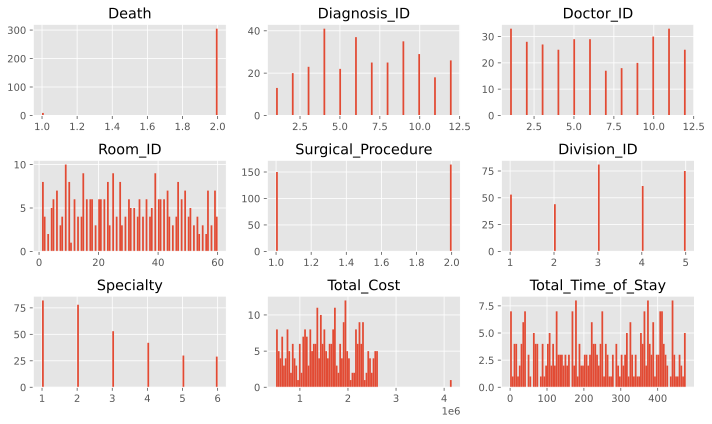

In [19]:


fig, axes = plt.subplots(3, 3, figsize=(10, 6))

for feature, ax in zip(dimensions, axes.ravel()):
    #if (feature=='Brand') | (feature=='Country'):
    #    df[feature].value_counts().plot.bar(ax=ax)
   # else:
    ax.hist(df[feature], bins=100)
    ax.set_title(feature)
plt.tight_layout()

In [20]:
pplot = sns.pairplot(df, vars=dimensions[2:])
pplot.fig.set_size_inches(18, 18)

In [21]:
pca_data = df[dimensions]

In [22]:
scaler = StandardScaler()
pca_data = scaler.fit_transform(pca_data)
pca_data[:, 0].std()

1.0000000000000002

In [23]:
pca = PCA(n_components=4)
res_pca = pca.fit_transform(pca_data)

In [24]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [25]:
# Create labels for the scree plot.
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 

Text(0.5, 1.0, 'Scree Plot')

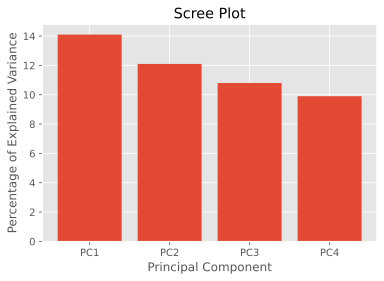

In [26]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

NameError: name 'cols' is not defined

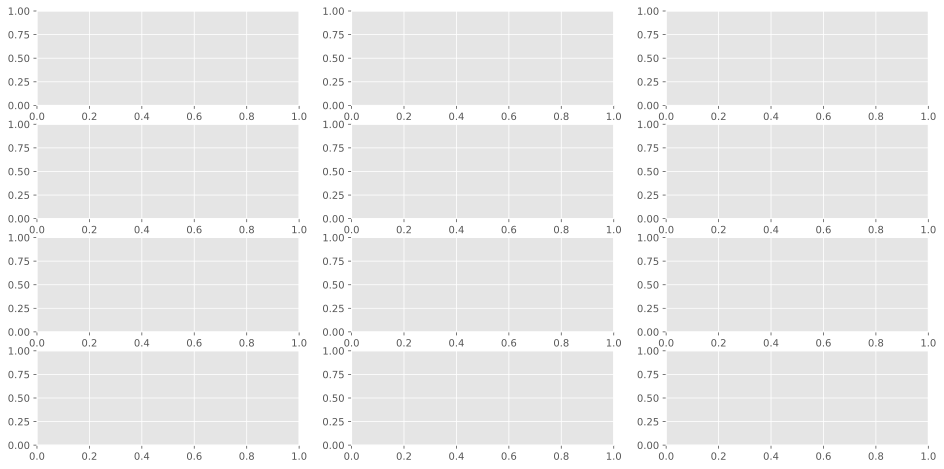

In [27]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))

for dim, ax in zip(dimensions, axes.ravel()):
    #cols = 'viridis'
    sizes = 20+20*pca_data[:, dimensions.index(dim)]
    ax.scatter(res_pca[:, 0], res_pca[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(dim)
plt.tight_layout()

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', degree=2)
res_kpca_poly = kpca.fit_transform(pca_data)

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))

for dim, ax in zip(dimensions, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*pca_data[:, dimensions.index(dim)]
    ax.scatter(res_kpca_poly[:, 0], res_kpca_poly[:, 1], s=sizes, alpha=0.3, c=df[dim], cmap=cols)
    ax.set_title(dim)
plt.tight_layout()

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
res_kpca_rbf = kpca.fit_transform(pca_data)

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))

for dim, ax in zip(dimensions, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*pca_data[:, dimensions.index(dim)]
    ax.scatter(res_kpca_rbf[:, 0], res_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[dim], cmap=cols)
    ax.set_title(dim)
plt.tight_layout()

In [ ]:
kpca = KernelPCA(n_components=2, kernel='cosine')
res_kpca_cos = kpca.fit_transform(pca_data)

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))

for dim, ax in zip(dimensions, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*pca_data[:, dimensions.index(dim)]
    ax.scatter(res_kpca_cos[:, 0], res_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[dim], cmap=cols)
    ax.set_title(dim)
plt.tight_layout()

In [ ]:
df['x_kpca_rbf'] = res_kpca_rbf[:, 0]
df['y_kpca_rbf'] = res_kpca_rbf[:, 1]

df['x_kpca_poly'] = res_kpca_poly[:, 0]
df['y_kpca_poly'] = res_kpca_poly[:, 1]

df['x_kpca_cos'] = res_kpca_cos[:, 0]
df['y_kpca_cos'] = res_kpca_cos[:, 1]

In [ ]:
df.head()

In [ ]:
df.to_csv('Data/hospital_latent.csv')
